July 9,2018

At the beginning of this week I read this article https://www.nytimes.com/2018/07/08/health/world-health-breastfeeding-ecuador-trump.html and decided to start with this project. The article says that in this spring United Nations-affiliated World Health Assembly, the American officials tried to change a resolution encouraging breastfeeding by removing language that called on governments to “protect, promote and support breast-feeding”. 

Therefore, I decided to answer the question: How Does the United States Rank According to the UN? 

I was able to find the continued breastfeeding rates around the world, though the data dates from year 2007 through 2011. The information did not include USA.I was just able to find US data from year 2011 and add it to my dataframe in my text editor. 

This is what I was able to find until now. However, my main goal is to find the data of breastfeeding immigrant mothers who are detained in more than 200 immigrant prisons and jails in the United States, according to this https://www.freedomforimmigrants.org/detention-statistics/. 

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
breastfeed_df=pd.read_csv('UNdata.csv')
breastfeed_df

,Country or Area,Subgroup,Year,Source,Unit,Value,Value Footnotes
0,Afghanistan,Total 20-23 mo,2007-2011,"UN_Demographic and Health Surveys (DHS), Multi...",Percent,54.0,1.0
1,Albania,Total 20-23 mo,2007-2011,"UN_Demographic and Health Surveys (DHS), Multi...",Percent,31.0,2.0
2,Algeria,Total 20-23 mo,2007-2011,"UN_Demographic and Health Surveys (DHS), Multi...",Percent,22.0,1.0
3,Angola,Total 20-23 mo,2007-2011,"UN_Demographic and Health Surveys (DHS), Multi...",Percent,37.0,1.0
4,Argentina,Total 20-23 mo,2007-2011,"UN_Demographic and Health Surveys (DHS), Multi...",Percent,28.0,2.0
5,Armenia,Total 20-23 mo,2007-2011,"UN_Demographic and Health Surveys (DHS), Multi...",Percent,23.0,2.0
6,Azerbaijan,Total 20-23 mo,2007-2011,"UN_Demographic and Health Surveys (DHS), Multi...",Percent,16.0,1.0
7,Bangladesh,Total 20-23 mo,2007-2011,"UN_Demographic and Health Surveys (DHS), Multi...",Percent,90.0,2.0
8,Belarus,Total 20-23 mo,2007-2011,"UN_Demographic and Health Surveys (DHS), Multi...",Percent,4.0,1.0
9,Belize,Total 20-23 mo,2007-2011,"UN_Demographic and Health Surveys (DHS), Multi...",Percent,27.0,1.0


In [3]:
#data cleaning
breastfeed_df= breastfeed_df.drop(columns=['Subgroup','Source','Unit','Value Footnotes'])

In [4]:
#Data cleaning
breastfeed_df=breastfeed_df.drop(breastfeed_df.index[125:132])

In [5]:
breastfeed_df.shape

(125, 3)

In [6]:
breastfeed_df.dtypes

Country or Area     object
Year                object
Value              float64
dtype: object

In [7]:
#Data cleaning
breastfeed_df= breastfeed_df.rename(columns={'Country or Area':'Country','Value':'Breastfeed_rate'})
breastfeed_df.head()

,Country,Year,Breastfeed_rate
0,Afghanistan,2007-2011,54.0
1,Albania,2007-2011,31.0
2,Algeria,2007-2011,22.0
3,Angola,2007-2011,37.0
4,Argentina,2007-2011,28.0


In [8]:
breastfeed_df.loc[70]

Country             Mongolia
Year               2007-2011
Breastfeed_rate           66
Name: 70, dtype: object

In [9]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [10]:
small_df= breastfeed_df[ breastfeed_df['Country'].isin(['World','United States of America'])]
small_df

,Country,Year,Breastfeed_rate
116,United States of America,2011,16.3
122,World,2007-2011,58.0


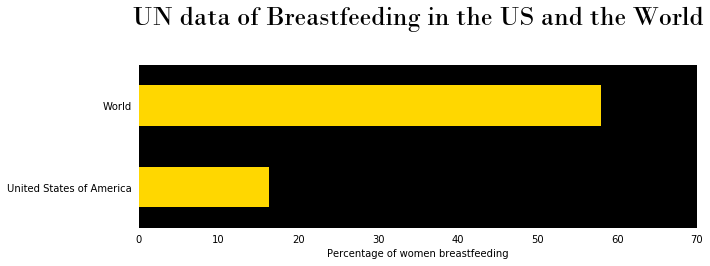

In [11]:
df = small_df.sort_values(by='Breastfeed_rate',ascending=True)
ax= df.plot(kind='barh',x='Country',y='Breastfeed_rate',figsize=(10,3),legend=False,color='gold')
ax.set_title('UN data of Breastfeeding in the US and the World',pad=40)
ax.title.set_fontsize(27)
ax.title.set_fontname('Bodoni MT')
ax.set_xticks([0,10,20,30,40,50,60,70,80])
ax.set_xticklabels([0,10,20,30,40,50,60,70,80])
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(which='major',left=False, bottom=False,grid_alpha=1.0)
ax.set_facecolor('black')

#ax.grid(True, axis='x',color='white',linestyle=':', linewidth=1)
ax.set_axisbelow(True)
ax.set_xlim(0,70)
ax.yaxis.label.set_visible(False)
ax.set_xlabel('Percentage of women breastfeeding')

plt.savefig('USandtheworld.pdf')

In [12]:
small_df2= breastfeed_df[ breastfeed_df['Country'].isin(['Nepal','United States of America'])]
small_df2

,Country,Year,Breastfeed_rate
77,Nepal,2007-2011,93.0
116,United States of America,2011,16.3


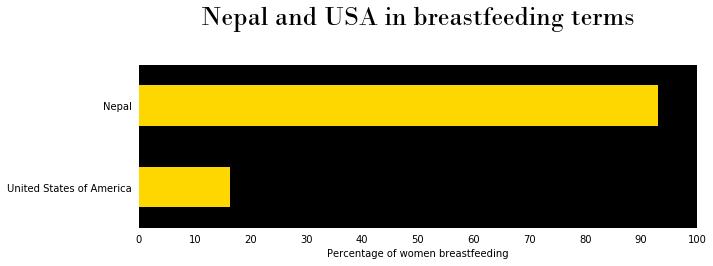

In [13]:
df = small_df2.sort_values(by='Breastfeed_rate',ascending=True)
ax= df.plot(kind='barh',x='Country',y='Breastfeed_rate',figsize=(10,3),legend=False,color='gold')
ax.set_title('Nepal and USA in breastfeeding terms',pad=40)
ax.title.set_fontsize(27)
ax.title.set_fontname('Bodoni MT')
ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
ax.set_xticklabels([0,10,20,30,40,50,60,70,80,90,100])
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(which='major',left=False, bottom=False,grid_alpha=1.0)
ax.set_facecolor('black')

#ax.grid(True, axis='x',color='white',linestyle=':', linewidth=1)
ax.set_axisbelow(True)
ax.set_xlim(0,100)
ax.yaxis.label.set_visible(False)
ax.set_xlabel('Percentage of women breastfeeding')
plt.savefig('themost.pdf')

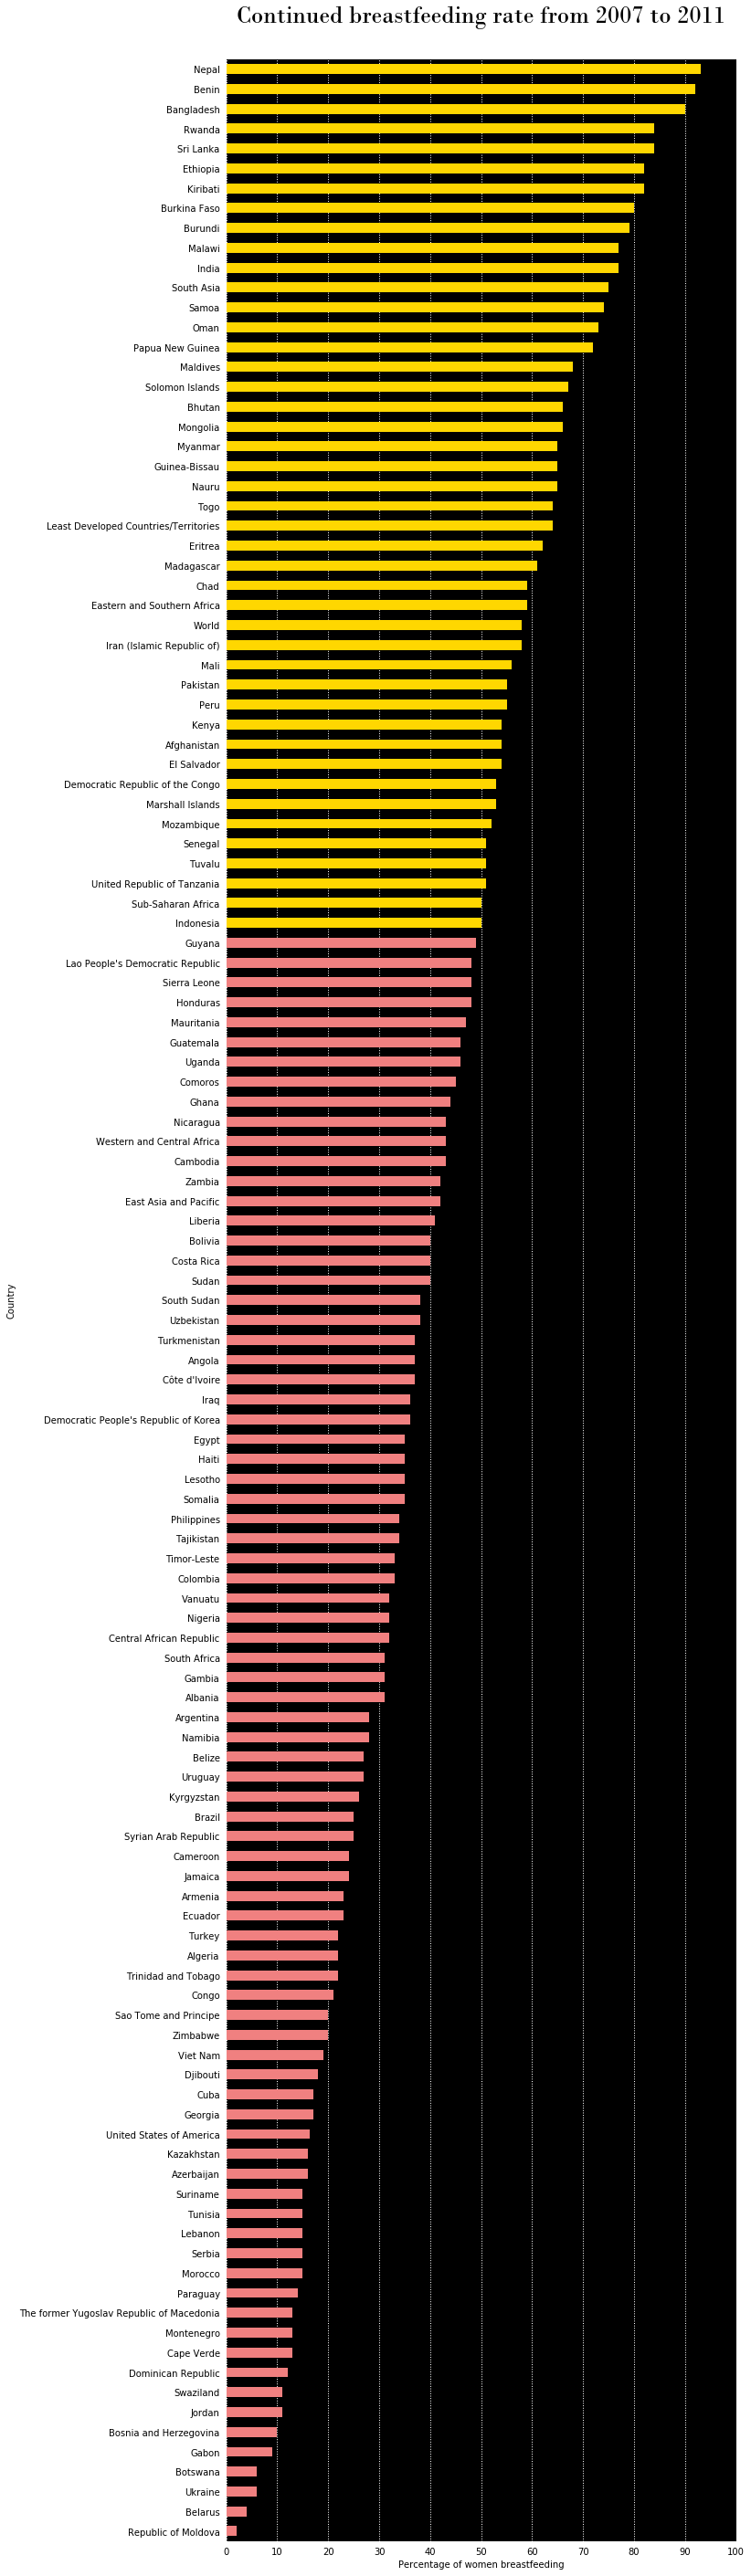

In [14]:
df = breastfeed_df.sort_values(by='Breastfeed_rate',ascending=True)

def get_color(val):
    if val >= 50:
        return 'gold'
    else:
        return 'lightcoral'

bar_colors = [get_color(val) for val in df.Breastfeed_rate]   
ax= df.plot(kind='barh',x='Country',y='Breastfeed_rate',figsize=(10,50),legend=False,color=bar_colors)
ax.set_title('Continued breastfeeding rate from 2007 to 2011',pad=40)
ax.title.set_fontsize(27)
ax.title.set_fontname('Bodoni MT')
ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
ax.set_xticklabels([0,10,20,30,40,50,60,70,80,90,100])
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(which='major',left=False, bottom=False,grid_alpha=1.0)
ax.set_facecolor('black')

ax.grid(True, axis='x',color='white',linestyle=':', linewidth=1)
ax.set_axisbelow(True)
ax.set_xlim(0,100)
ax.yaxis.label.set_visible(True)
ax.set_xlabel('Percentage of women breastfeeding')
ax.set_ylabel('Country')

plt.savefig('particularreferencetochildrenwell-being.pdf')

July 16, 2018
Second Draft--changes everywhere
#Now I have to find the data of infant mortality to do a more concise comparison or analysis. 

The infant mortality death is the probability of dying between birth and exact age one. It is expressed as average annual deaths per 1,000 birth. 

In [15]:
import glob
infant_mortality= glob.glob('Deaths/*.csv')
infant_mortality
#infant_mortality.drop(columns=['Subgroup','Source','Unit','Value Footnotes'])

['Deaths\\Mortality.csv', 'Deaths\\Mortality1.csv']

In [75]:
dataframes=[]
for deaths in infant_mortality:
    df=pd.read_csv(deaths)
    df['deaths']=deaths
    dataframes.append(df)

all_deaths=pd.concat(dataframes,ignore_index=True)
#all_deaths[all_deaths['Country or Area']=='Afghanistan']
#This is the issue I have to work with now, country repetition because of different periods of time 

In [76]:
all_deaths.rename(columns = {'Country or Area':'Country','Value':'Mortality_rate','Year(s)':'Years'}, inplace = True)

In [77]:
all_deaths.dtypes

Country            object
Years              object
Variant            object
Mortality_rate    float64
deaths             object
dtype: object

In [79]:
all_deaths2 =all_deaths.groupby(by='Country').Mortality_rate.mean().reset_index()
all_deaths2.head()

,Country,Mortality_rate
0,Afghanistan,72.6415
1,Africa,62.6630
2,Albania,15.6745
3,Algeria,30.1265
4,American Samoa,NaN


I tried to solved having two periods of time with a loop. But it was a really bad idea. I never got it to work. 
#for country in all_deaths['Country'].unique():
    #all_deaths[all_deaths['Country'] == country & all_deaths['Years'] > year1 & all_deaths['Years'] < year2]

July 17, 2018
Final dataframe

In [42]:
data=breastfeed_df.merge(all_deaths2, left_on='Country', right_on='Country')

In [33]:
data.dtypes

Country             object
Year                object
Breastfeed_rate    float64
Mortality_rate     float64
dtype: object

Let's do this comparing the US per region to get a clear picture of what's happening around the world.

I will write down each country of Latin America to see which ones are actually available in the DF. Remember that the countries that are part of the first database are the ones that the UN consider critical areas for children’s well-being

In [22]:
Americas= data[data['Country'].isin(['Caribbean','Antigua and Barbuda','Aruba','Bahamas','Barbados','Cuba','Curaçao','Dominican Republic','Grenada','Guadeloupe','Haiti','Jamaica','Martinique','Puerto Rico','Saint Lucia', 'Saint Vincent and the Grenadines','Trinidad and Tobago','Belize','Costa Rica','El Salvador','Guatemala','Honduras','Mexico','Nicaragua','Panama', 'Argentina', 'Bolivia','Brazil','Chile','Colombia', 'Ecuador', 'French Guiana', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela (Bolivarian Republic of)','United States of America'])]
Americas.drop(columns=['Year'])

,Country,Breastfeed_rate,Mortality_rate
4,Argentina,28.0,14.1475
9,Belize,27.0,15.6540
12,Bolivia,40.0,46.9715
15,Brazil,25.0,18.0775
22,Colombia,33.0,18.4755
25,Costa Rica,40.0,9.6785
26,Cuba,17.0,5.5910
29,Dominican Republic,12.0,27.3230
30,Ecuador,23.0,22.2165
32,El Salvador,54.0,18.8765


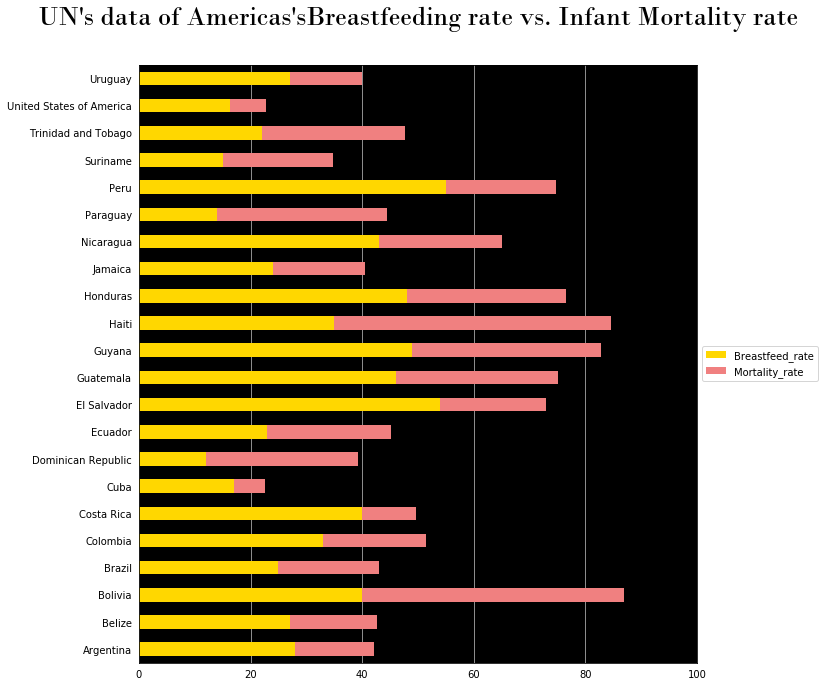

In [26]:
df=Americas.sort_values(by='Mortality_rate',ascending=False)
colors = ['gold', 'lightcoral']

ax = Americas.plot(kind='barh', x='Country', stacked=True, color=colors, figsize=(10,11))
ax.set_title("UN's data of Americas'sBreastfeeding rate vs. Infant Mortality rate",pad=40)
ax.title.set_fontsize(27)
ax.title.set_fontname('Bodoni MT')

L = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.tick_params(which='major',left=False, bottom=False,grid_alpha=1.0)
ax.set_facecolor('black')

ax.grid(True, axis='x')
ax.set_axisbelow(True)
ax.set_xlim(0,100)
ax.yaxis.label.set_visible(False)
plt.savefig('Americasgraph.pdf')

In [27]:
Oceania= data[data['Country'].isin(['Australia','New Zealand','Papua New Guinea','Fiji','Solomon Islands','Vanuatu','Samoa','Kiribati','Tonga','Micronesia','Palau'])]
Oceania.drop(columns=['Year'])

,Country,Breastfeed_rate,Mortality_rate
52,Kiribati,82.0,48.0995
76,Papua New Guinea,72.0,50.4475
82,Samoa,74.0,19.6490
87,Solomon Islands,67.0,34.3765
111,Vanuatu,32.0,26.4850


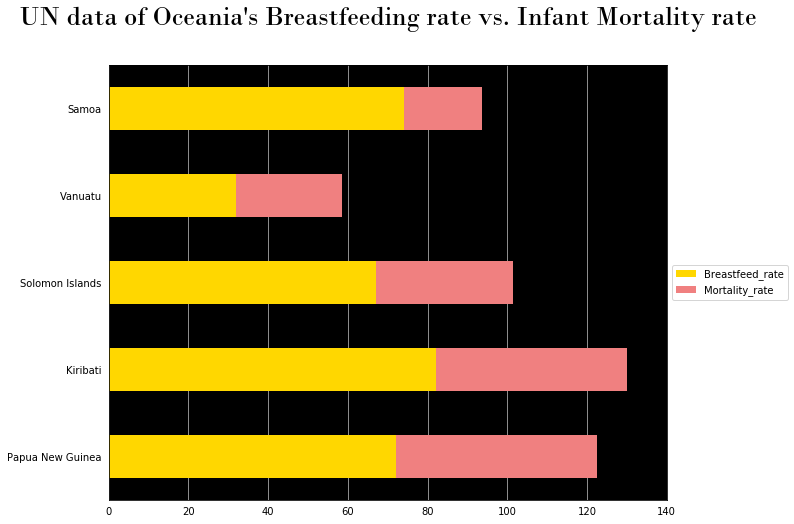

In [71]:
df=Oceania.sort_values(by='Mortality_rate',ascending=False)
colors = ['gold', 'lightcoral']

ax = df.plot(kind='barh', x='Country', stacked=True, color=colors, figsize=(10,8))
ax.set_title("UN data of Oceania's Breastfeeding rate vs. Infant Mortality rate",pad=40)
ax.title.set_fontsize(27)
ax.title.set_fontname('Bodoni MT')

L = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.tick_params(which='major',left=False, bottom=False,grid_alpha=1.0)
ax.set_facecolor('black')

ax.grid(True, axis='x')
ax.set_axisbelow(True)
ax.set_xlim(0,140)
ax.yaxis.label.set_visible(False)
plt.savefig('Oceaniasgraph.pdf')

In [62]:
Africa= data[data['Country'].isin(['Algeria','Angola','Benin','Botswana','Burkina Faso','Burundi',
'Cabo Verde','Cameroon','Central African Republic','Chad','Comoros',
'Democratic Republic of the Congo', "Cote d'Ivoire", 'Djibouti', 
'Egypt',
'Equatorial Guinea',
'Eritrea',
'Ethiopia',
'Gabon',
'Gambia',
'Swaziland',
'Tanzania',
'Togo',
'Tunisia',
'Uganda','Zambia','Zimbabwe', 'Ghana','Guinea',' Guinea-Bissau','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia',
      'Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan'])]

In [ ]:
#There are too many countries of Africa. Had to make a smaller df
Africa=Africa.drop(columns=['Year']).sort_values(by='Mortality_rate').head(10)

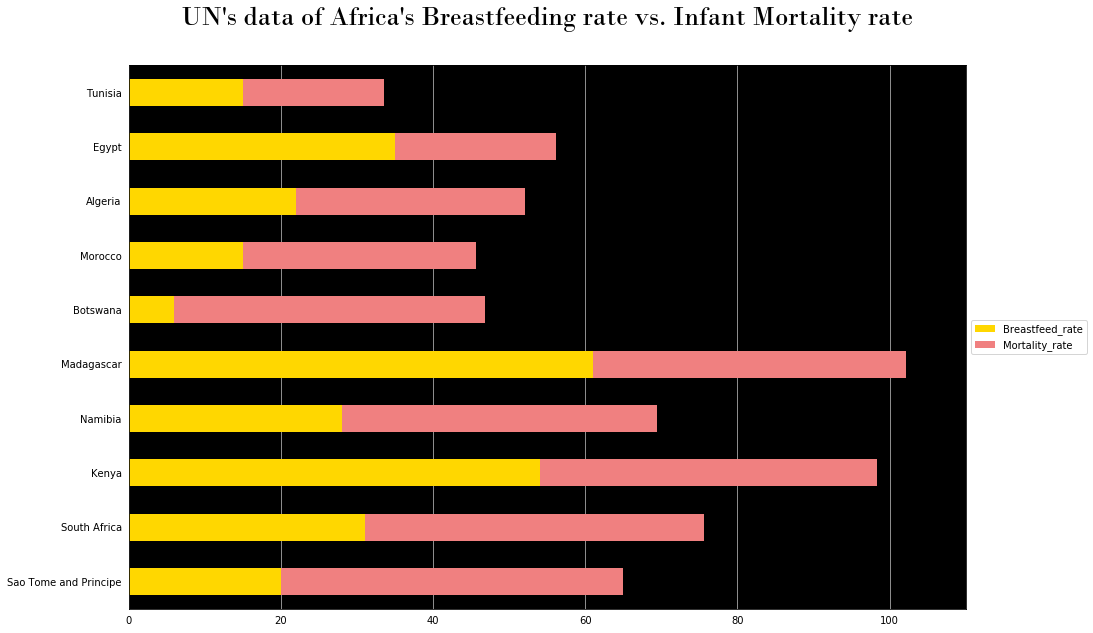

In [72]:
df=Africa.sort_values(by='Mortality_rate',ascending=False)
colors = ['gold', 'lightcoral']

ax = df.plot(kind='barh', x='Country', stacked=True, color=colors, figsize=(15,10))
ax.set_title("UN's data of Africa's Breastfeeding rate vs. Infant Mortality rate",pad=40)
ax.title.set_fontsize(27)
ax.title.set_fontname('Bodoni MT')

L = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.tick_params(which='major',left=False, bottom=False,grid_alpha=1.0)
ax.set_facecolor('black')

ax.grid(True, axis='x')
ax.set_axisbelow(True)
ax.set_xlim(0,110)
ax.yaxis.label.set_visible(False)
plt.savefig('Africasgraph.pdf')